In [220]:
import pandas as pd
import numpy as np
### Learned "hidden" representation ###
hiddens=pd.read_csv('hiddens2.csv', index_col=0)
hiddens['proteinID'] = [name.split('_')[0] for name in hiddens.name]
hiddens = hiddens.drop('name', 1)

###  original data file, preprocessed while training to get rid of less populated positions ### 
combined_RRMs = pd.read_csv('combined_processed_RRM.csv', index_col=0)
combined_RRMs['proteinID'] = [ind.split('.')[0] for ind in combined_RRMs.index]

#### get protein representation by summing ####

In [221]:
protein_hiddens = hiddens.groupby('proteinID').sum()/hiddens.groupby('proteinID').count()
protein_hiddens.index = [geneID.split('.')[0] for geneID in protein_hiddens.index]
protein_hiddens.index.names = ['proteinID']
protein_hiddens['proteinID'] = protein_hiddens.index
protein_hiddens

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,geneID
geneID,,,,,,,,,,,,,,,,,,,,,
A0A010Q373,-0.610613,-0.809829,-0.281400,0.158038,-0.593262,0.242897,0.414149,0.038784,0.408153,0.669348,...,-0.130278,-0.124661,0.889555,0.159699,-0.195867,0.640239,0.478911,-0.764882,-0.423451,A0A010Q373
A0A010Q8C0,-0.385441,-0.987656,-0.245588,0.319142,-0.733709,-0.123238,0.711150,0.627909,0.392763,0.234607,...,-0.505550,-0.717637,0.975674,0.688447,0.007128,0.403071,0.321797,-0.909399,0.092448,A0A010Q8C0
A0A010QBV6,-0.887903,-0.881709,-0.593452,0.675849,-0.830306,-0.513717,0.798636,-0.471346,0.052668,0.685736,...,0.113214,-0.212011,0.976684,0.653766,0.025896,0.861580,0.951490,-0.865565,-0.317165,A0A010QBV6
A0A010QC58,-0.523209,-0.721058,0.515160,0.403988,-0.778521,-0.038859,0.773570,0.048690,0.454192,0.399850,...,-0.009108,-0.243264,0.768349,0.121781,0.241631,0.314408,0.961856,-0.440342,-0.029857,A0A010QC58
A0A010QCE6,-0.722296,-0.950121,-0.824745,0.298040,-0.704525,0.314614,0.709318,0.018008,-0.040984,0.341770,...,0.287989,-0.147120,0.722001,0.541892,0.235290,0.509872,0.948886,-0.641798,-0.109089,A0A010QCE6
A0A010QHG6,-0.967609,-0.992269,-0.949065,0.558174,-0.547852,-0.150681,0.698351,-0.479029,-0.351545,0.575172,...,0.915685,-0.567040,0.386616,-0.933380,-0.316087,0.852610,0.787204,-0.465781,-0.323434,A0A010QHG6
A0A010QIG0,-0.841415,-0.640061,0.200195,0.489601,-0.645248,0.107871,0.768474,0.000736,0.707340,0.782619,...,-0.091362,-0.183737,0.875642,0.136505,-0.201040,0.412346,0.837280,-0.686407,0.040578,A0A010QIG0
A0A010QJH0,-0.764393,-0.635738,0.534210,0.331982,-0.777845,0.024840,0.728601,-0.244956,0.833053,0.319875,...,0.295635,-0.107177,0.964421,0.680659,0.040492,0.439414,0.954785,-0.484673,0.245444,A0A010QJH0
A0A010QK79,-0.765041,-0.639910,-0.163478,0.241926,-0.530193,0.080853,0.426055,-0.428192,0.474365,0.595000,...,0.127851,-0.378426,0.720607,0.102834,0.102160,0.549730,0.554107,-0.406750,0.074342,A0A010QK79


### matching file from and proteinID to geneID ###

In [58]:
import re
with open('../data/tentative_genename_mapping.tab', 'rb') as original_file:
    for i, line in enumerate(original_file):
        with open('../data/tentative_genename_mapping.csv', 'a') as new_file:
            line = re.sub(b'\t', b',', line)
            new_file.write(line.decode("utf-8") )

In [222]:
match = pd.read_csv('../data/tentative_genename_mapping.csv')
protein_matched = pd.merge(protein_hiddens, match, left_on='protein_ID', right_on='From')
protein_matched['protein_type'] = [protein_name.split('_')[0] for protein_name in protein_matched['To']]
protein_matched.index  = protein_matched['protein_type']

#### top 84 populated positions for verified RRMs, used to get learned representation ###

In [281]:
RRM_matched = pd.merge(combined_RRMs, match, left_on='proteinID', right_on='From')
verified_RRM_df = RRM_matched[[to in verified_RRMs.index for to in RRM_matched['To']]]
verified_RRM_df = verified_RRM_df.rename(columns={'To': 'geneID'})
verified_RRM_df
verified_RRM_df = verified_RRM_df.set_index('geneID')
verified_RRM_df = verified_RRM_df.drop(['proteinID', 'From'], 1)
verified_RRM_df.to_csv('verified_RRMs.csv')

Verified RBP geneIDs:
    
'TIAL1', 
'NONO',
'NCL',
'HNRNPM',
'ELAVL1',
'HNRNPR',
'RBM12',
'ELAVL4',
'ELAVL3'
'HNRNPH3',
'CELF1',
'PABPC4',
'SYNCRIP',
'PUF60', 
'PABPC5', 
'RBM39', 
'RBPMS', 
'SPEN', 
'RBPMS2', 
'A1CF', 
'HNRNPAB', 
'HNRNPR', 
'SRSF2', 
'SRSF1', 'SRSF10', 'SRSF11', , 'SRSF12',, 'SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7',
       'SRSF9', 
    'RBM39', 'U2AF1', 'U2AF2', 'RBM23', 'RBM34', 'RBM19', 'RBM17', 'RBM5'

In [223]:
def get_RRM_group(starting_letters, num=20):
    group = protein_matched['protein_type'][[starting_letters in protein for protein in protein_matched['protein_type']]
                                           ].groupby('protein_type').count()
    group = group[group.sort_values(ascending=False)>num].index.values.astype(str)
    return group.tolist()

### These proteins are verified RBPs on http://www.genecards.org/ ###

In [224]:
verified_RRMs = get_RRM_group('SRSF') + get_RRM_group('RBM') + get_RRM_group('A1CF') + get_RRM_group('SPEN') +\
get_RRM_group('HNRN') + get_RRM_group('TIAL') + get_RRM_group('NONO')+ ['NCL'] + get_RRM_group('PABPC') + get_RRM_group('SYNCRIP')\
+ get_RRM_group('PUF') + get_RRM_group('U2AF')

In [226]:
verified_RRMs  = protein_matched[[protein in verified_RRMs for protein in protein_matched['protein_type']]].drop(
['From', 'To', 'geneID', 'protein_type'], 1)

In [192]:
import sys
sys.path.append('../util/')
from imp import reload
import tsne
reload(tsne)
tsne.plot('Verified RRMs', verified_RRMs.index.values.tolist(), verified_RRMs.values, perplexity=400)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 969 / 969
[t-SNE] Mean sigma: 3.007807
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.525315
[t-SNE] Error after 550 iterations: 0.525315


Using matplotlib backend: MacOSX
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 1.818223
[t-SNE] KL divergence after 100 iterations with early exaggeration: -0.065336
[t-SNE] Error after 125 iterations: -0.065336


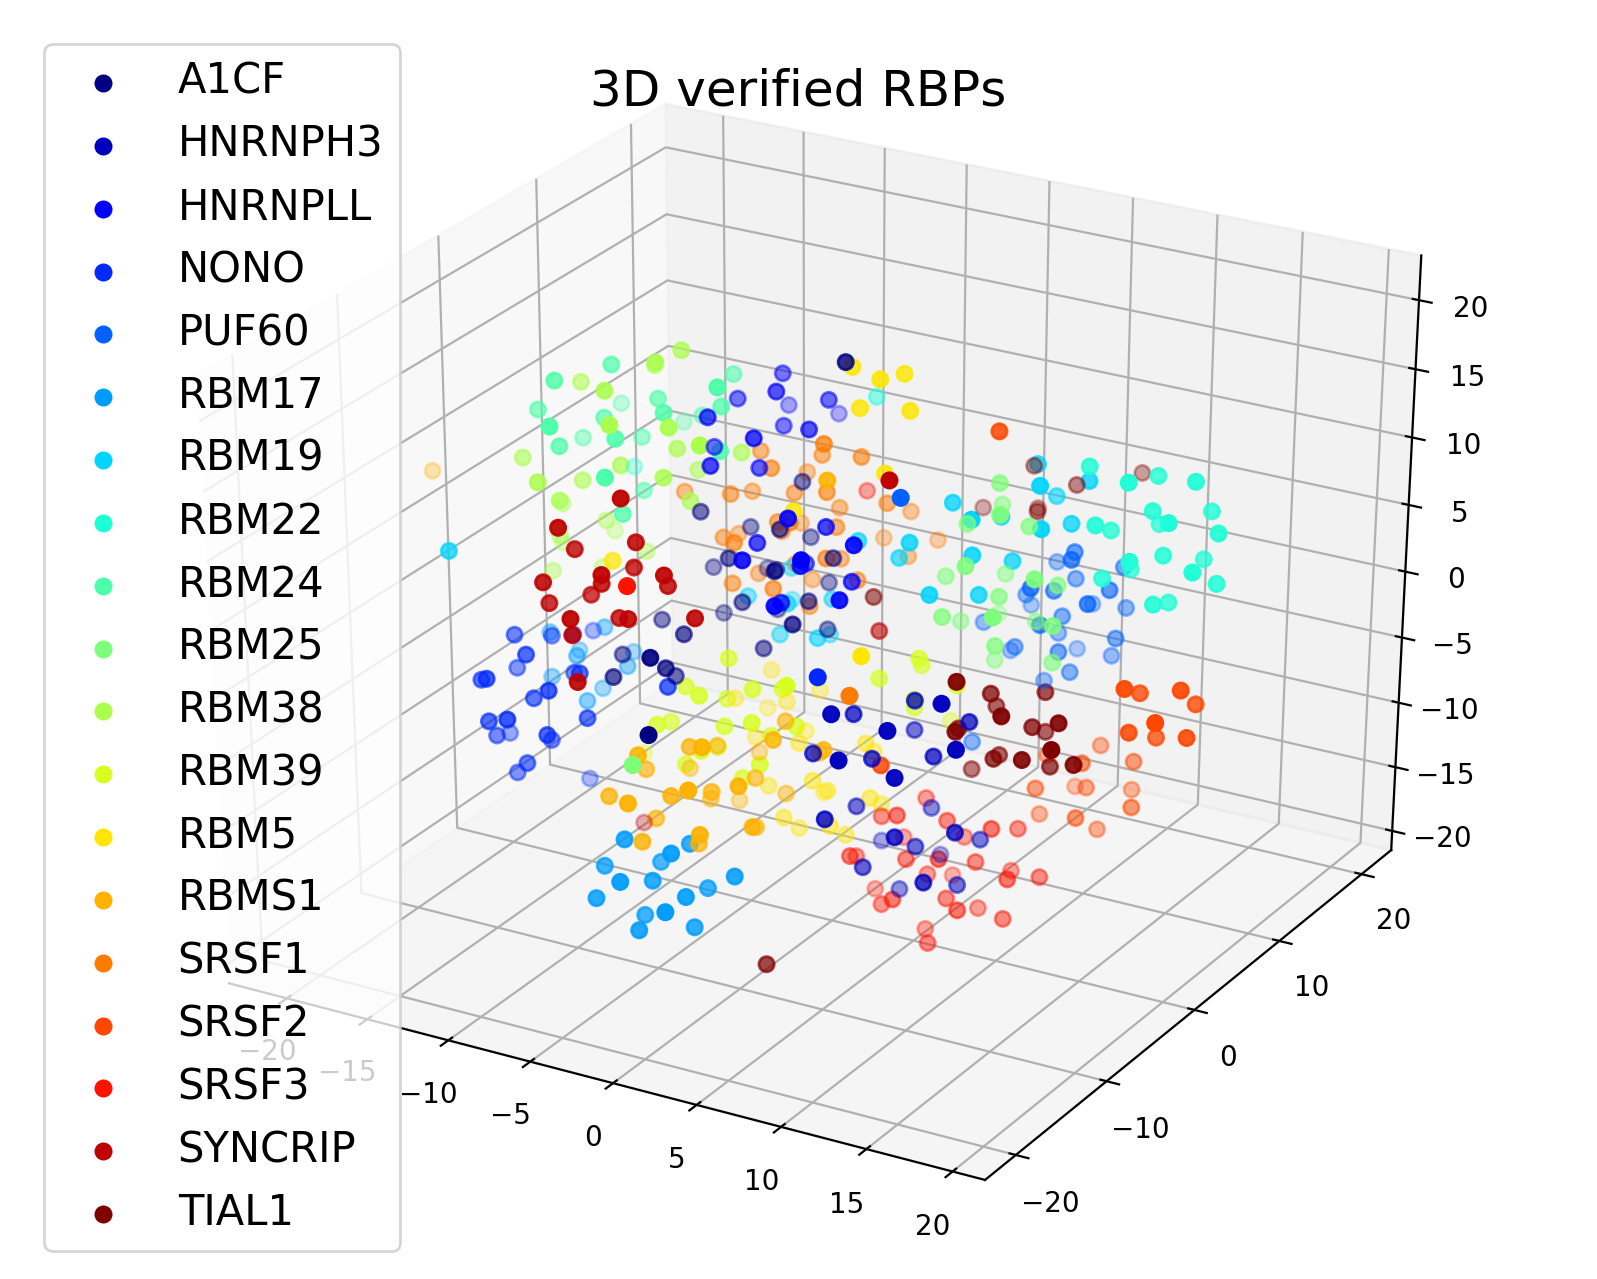

In [229]:
%matplotlib
reload(tsne)
tsne.plot3d('3D verified RBPs', verified_RRMs.index.values.tolist(), verified_RRMs.values, perplexity=100)

### Investigating the original Data file ###

In [286]:
from preprocessing import txt_to_csv

def informative_positions(df, processed_RRM_path, filter_threshold=None, top_n=82, placeholder='-', return_df = False):
    """rid of excessive placeholders, 
    keeping top_n most populated positions
    or filterout positions populated less than a threshold"""
    if top_n:
        print('Extracting top %d most populated positions...'%top_n)
    elif filter_threshold:
        print('Filtering out positions  more than %.2f%% populated...'%(filter_threshold*100))
    else:
        raise ValueError('either filter_threshold or top_n has to be a number.')
        
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    if top_n:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) \
                             if rate in sorted(populate_rate, reverse=True)[:top_n]]
    else:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) if rate > filter_threshold]
    if return_df:
        print('keeping %d positions in sequence'%(len(positions_to_keep)+2))
        informative_values = list(map(lambda x: ['<start>'] + x.tolist() + ['<end>'], 
                                      df[positions_to_keep].values))
        df1 = pd.DataFrame(informative_values, index=df.index)
    #     df1.to_csv(processed_RRM_path)
        print('Done! Filtered df output as %s'%processed_RRM_path)
        return populate_rate, positions_to_keep, df1
    else:
        return populate_rate, positions_to_keep

threshold =1/100
original_file = '../data/comineddata_nolinegaps_space_delim.fasta'
original_df = txt_to_csv(original_file, sep=' ')
pop_rate, positions = informative_positions(original_df, None, filter_threshold=threshold, top_n=None)

Parsing sequence input file...
Filtering out positions  more than 1.00% populated...


In [290]:
## Labeled Data ##
labeled_RRM_original = original_df[['||' in ind for ind in original_df.index]]
unlabeled_RRM_original  = original_df[['||' not in ind for ind in original_df.index ]]

In [291]:
labeled_RRM_original.shape

(719, 605)

In [292]:
unlabeled_RRM_original.shape

(99932, 605)

In [297]:
def get_pop_percentage(df, positions, placeholder='-'):
    df = df.loc[:, positions]
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    return populate_rate

In [336]:
get_pop_percentage(labeled_RRM_original, positions)[153]

0.097357440890125171

In [318]:
get_pop_percentage(unlabeled_RRM_original, positions)[433]

0.98425929632149867

In [364]:
from operator import itemgetter 
itemgetter(*[int(x) for x in np.arange(0, len(positions), 10)])(positions)
#li = [x in np.arange(0, len(positions), 10) for x in np.arange(0, len(positions))]
#np.array(positions)
#positions

(10, 43, 122, 201, 292, 347, 472, 545, 582)

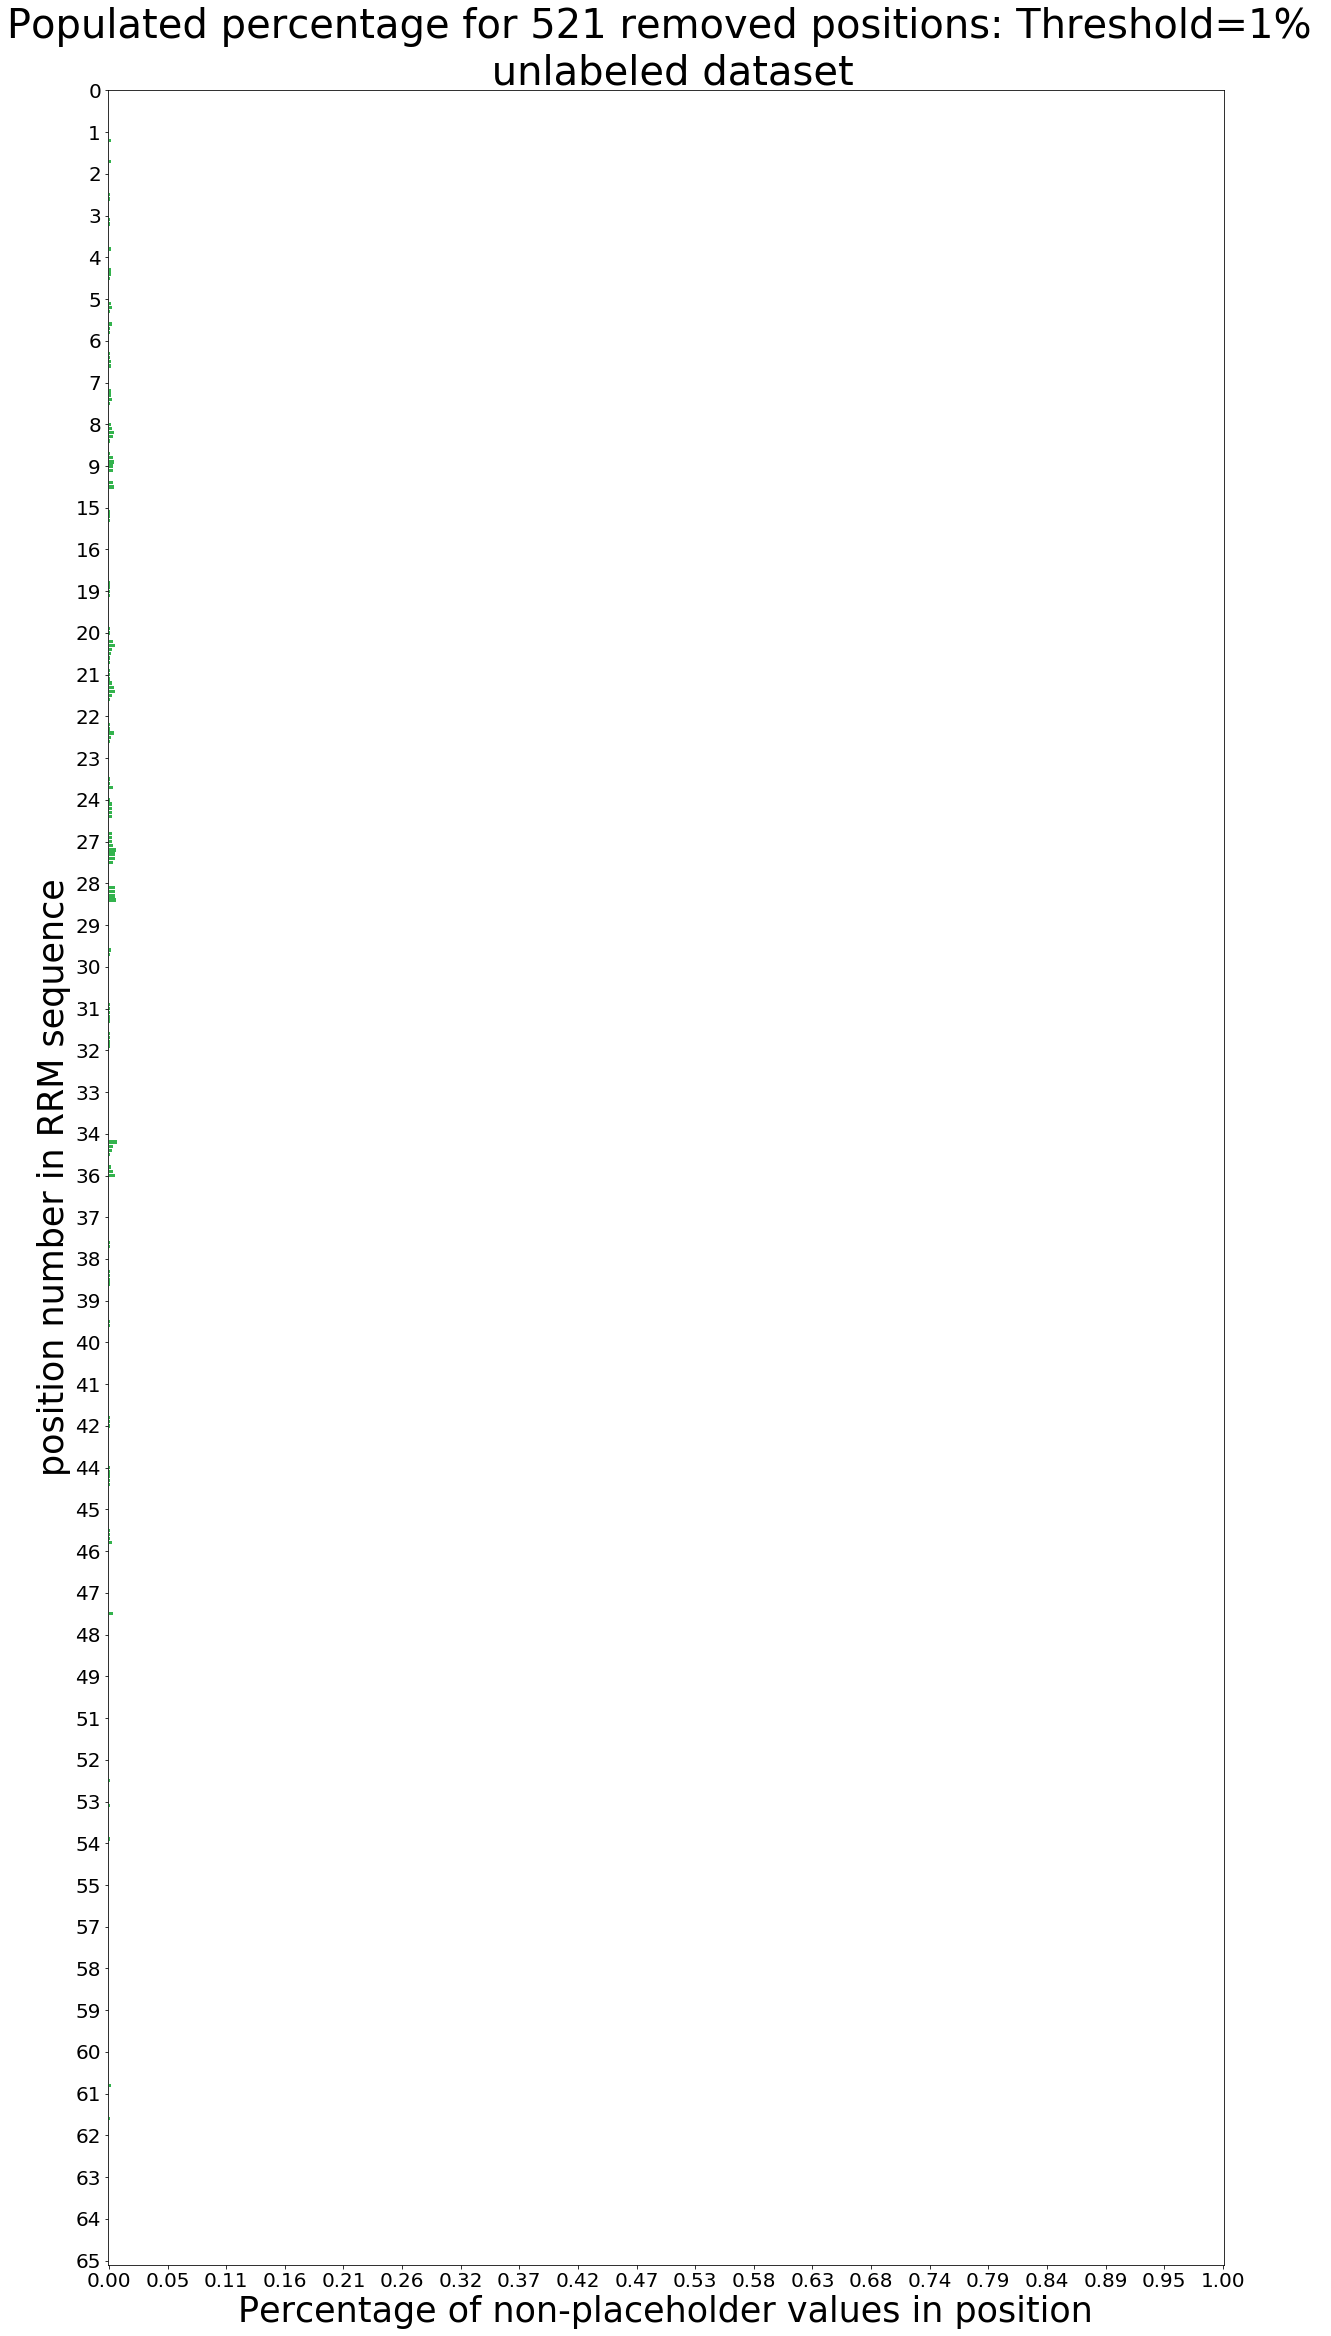

In [365]:
%matplotlib inline
import matplotlib.pyplot as plt
from operator import itemgetter 
import re
threshold = .01
def plot_num_population(df, threshold, positions, dataset='labeled dataset', kept=True):
    if kept:
        title = 'Populated percentage for %d kept positions: Threshold=%.0f%% \n %s'%(
            len(positions), threshold*100, dataset)
        color=[.2, .4, .7], 
    else:
        title = 'Populated percentage for %d removed positions: Threshold=%.0f%% \n %s'%(
            len(positions), threshold*100, dataset)
        color=[.2, .7, .3]
    
    pop_num = get_pop_percentage(df, positions)
    
    fig, ax = plt.subplots(figsize=(20, 40))
    y_pos = [np.floor(num) for num in np.linspace(0, len(pop_num), 50)]
    ax.barh(np.arange(0, len(pop_num)), pop_num, align='center', color=color)
    ax.invert_yaxis()    
    if kept:
        ax.set_yticks(np.arange(0, len(pop_num)))
    else:
        ax.set_yticks(np.arange(0, len(pop_num), 10))
        yticklabels = itemgetter(*[int(x) for x in np.arange(0, len(positions), 10)])(positions)
    ax.set_yticklabels(positions, fontsize=20)
    ax.set_ylim([len(pop_num) + 1e-3, -1e-3])
    ax.set_ylabel('position number in RRM sequence', fontsize=35)
    ax.set_xlabel('Percentage of non-placeholder values in position', fontsize=35)
    ax.set_xlim([-1e-3, 1+1e-3]) 
    x_pos = np.linspace(0, 1, 20)
    ax.set_xticks(x_pos)
    x_pos = ["%.2f"%num for num in x_pos]
    ax.set_xticklabels(x_pos, fontsize=20)
    plt.title(title, fontsize=40)
    plt.show()
    fig.savefig('%s.png'%re.sub(' ', '_', title))
plot_num_population(unlabeled_RRM_original, threshold, removed_positions, dataset='unlabeled dataset', kept=False)
# plot_num_population(labeled_RRM_original, threshold, positions, dataset='labeled dataset', kept=True)  

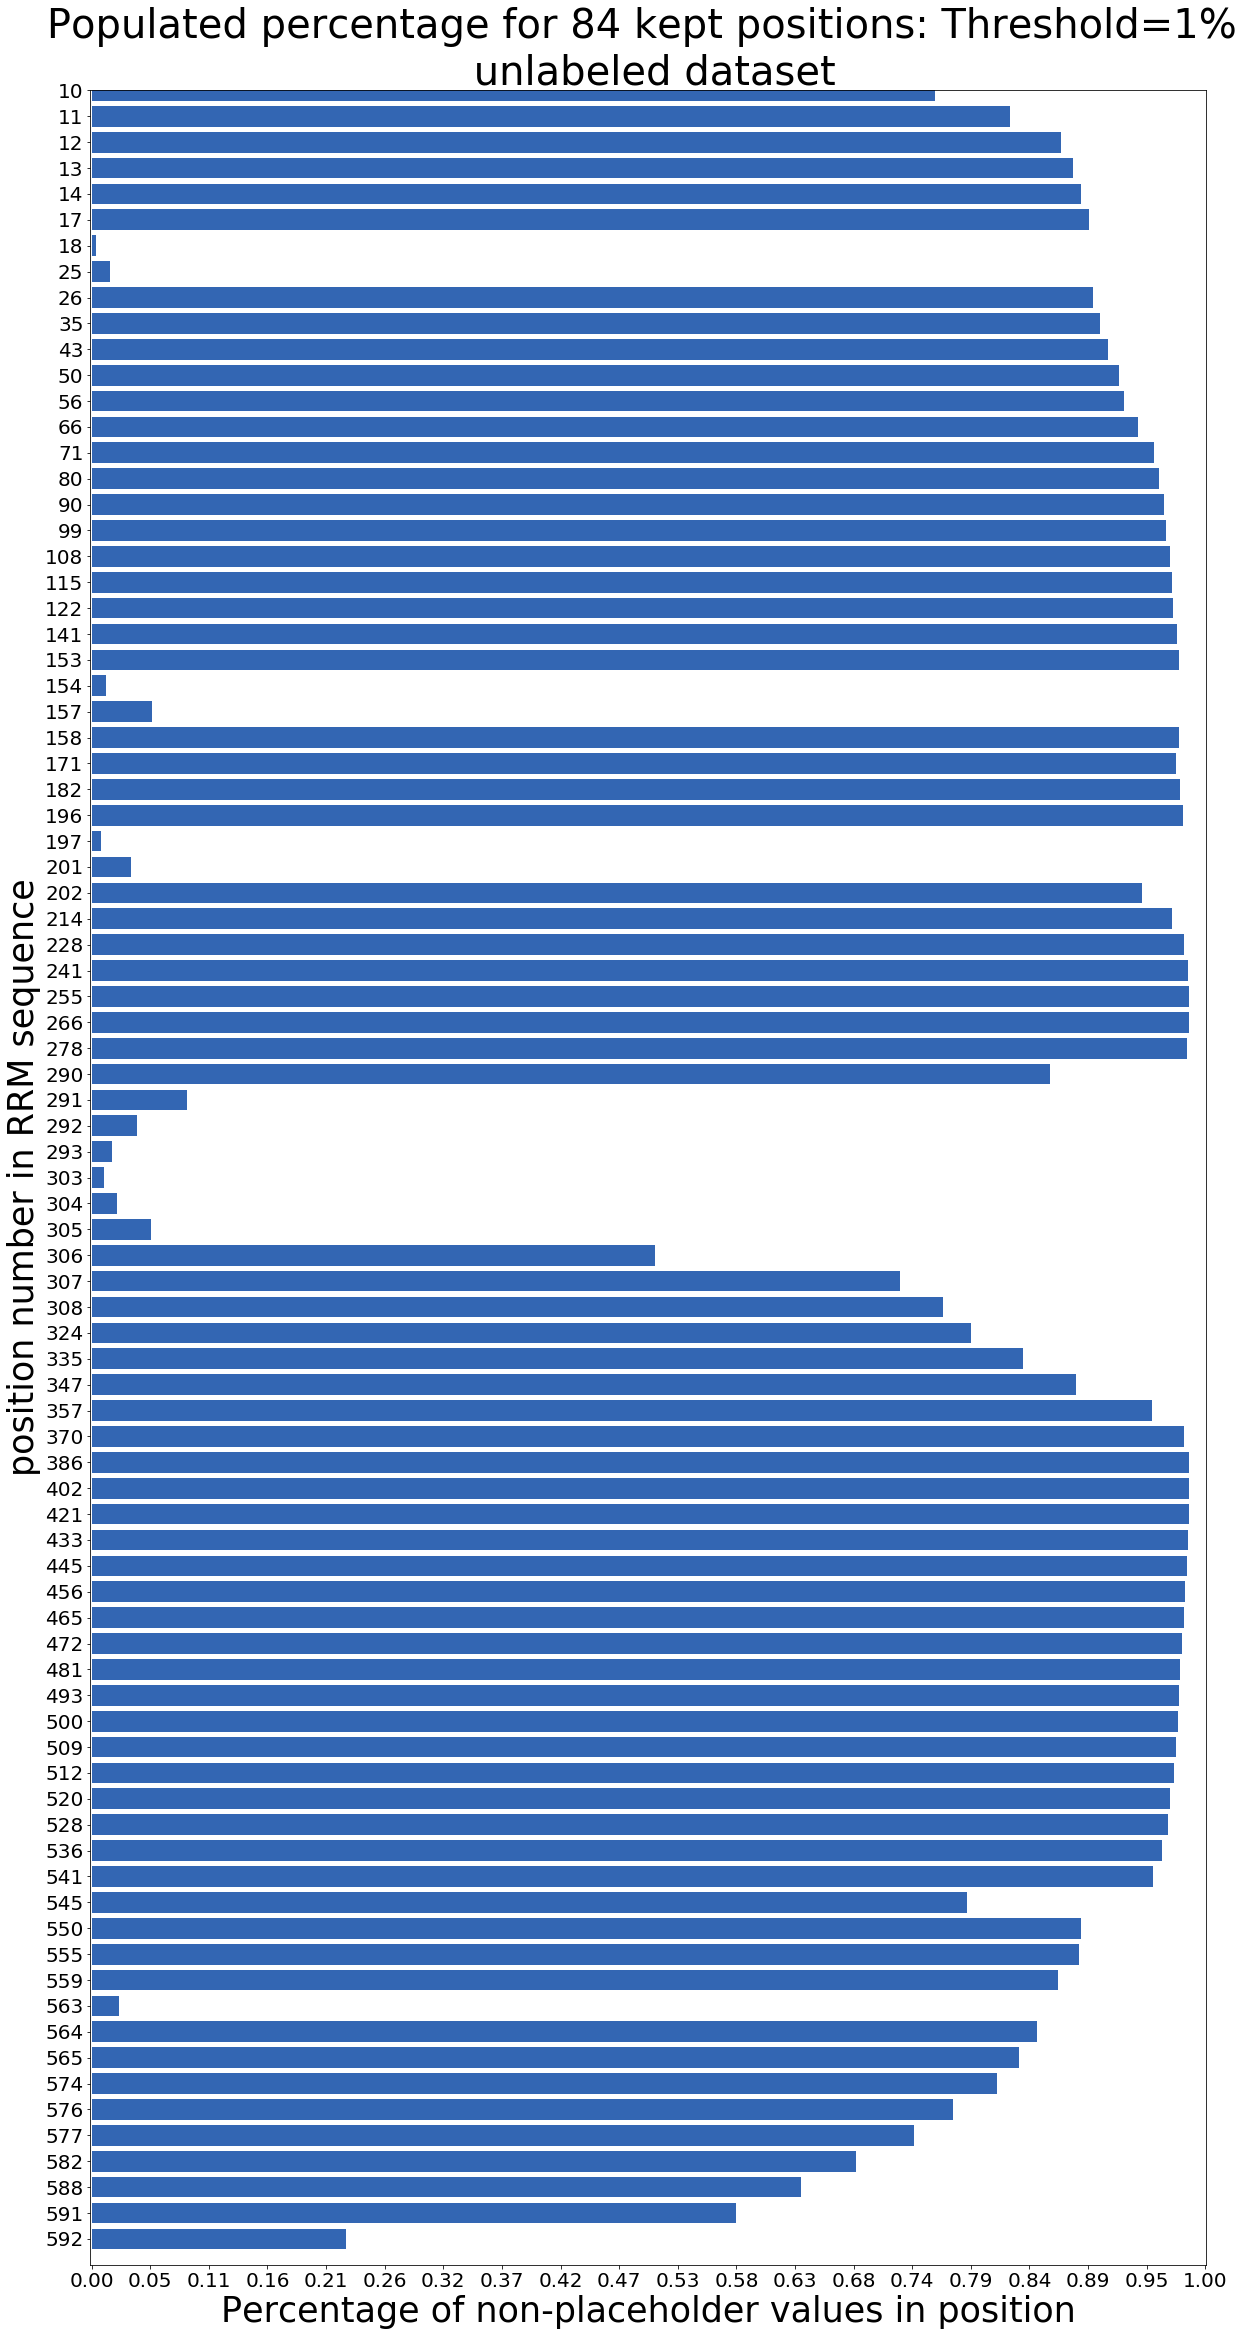

In [338]:
plot_num_population(unlabeled_RRM_original, threshold, positions, dataset='unlabeled dataset', kept=True)  

In [304]:
removed_positions = [pos for pos in np.arange(original_df.shape[1]) if pos not in positions]

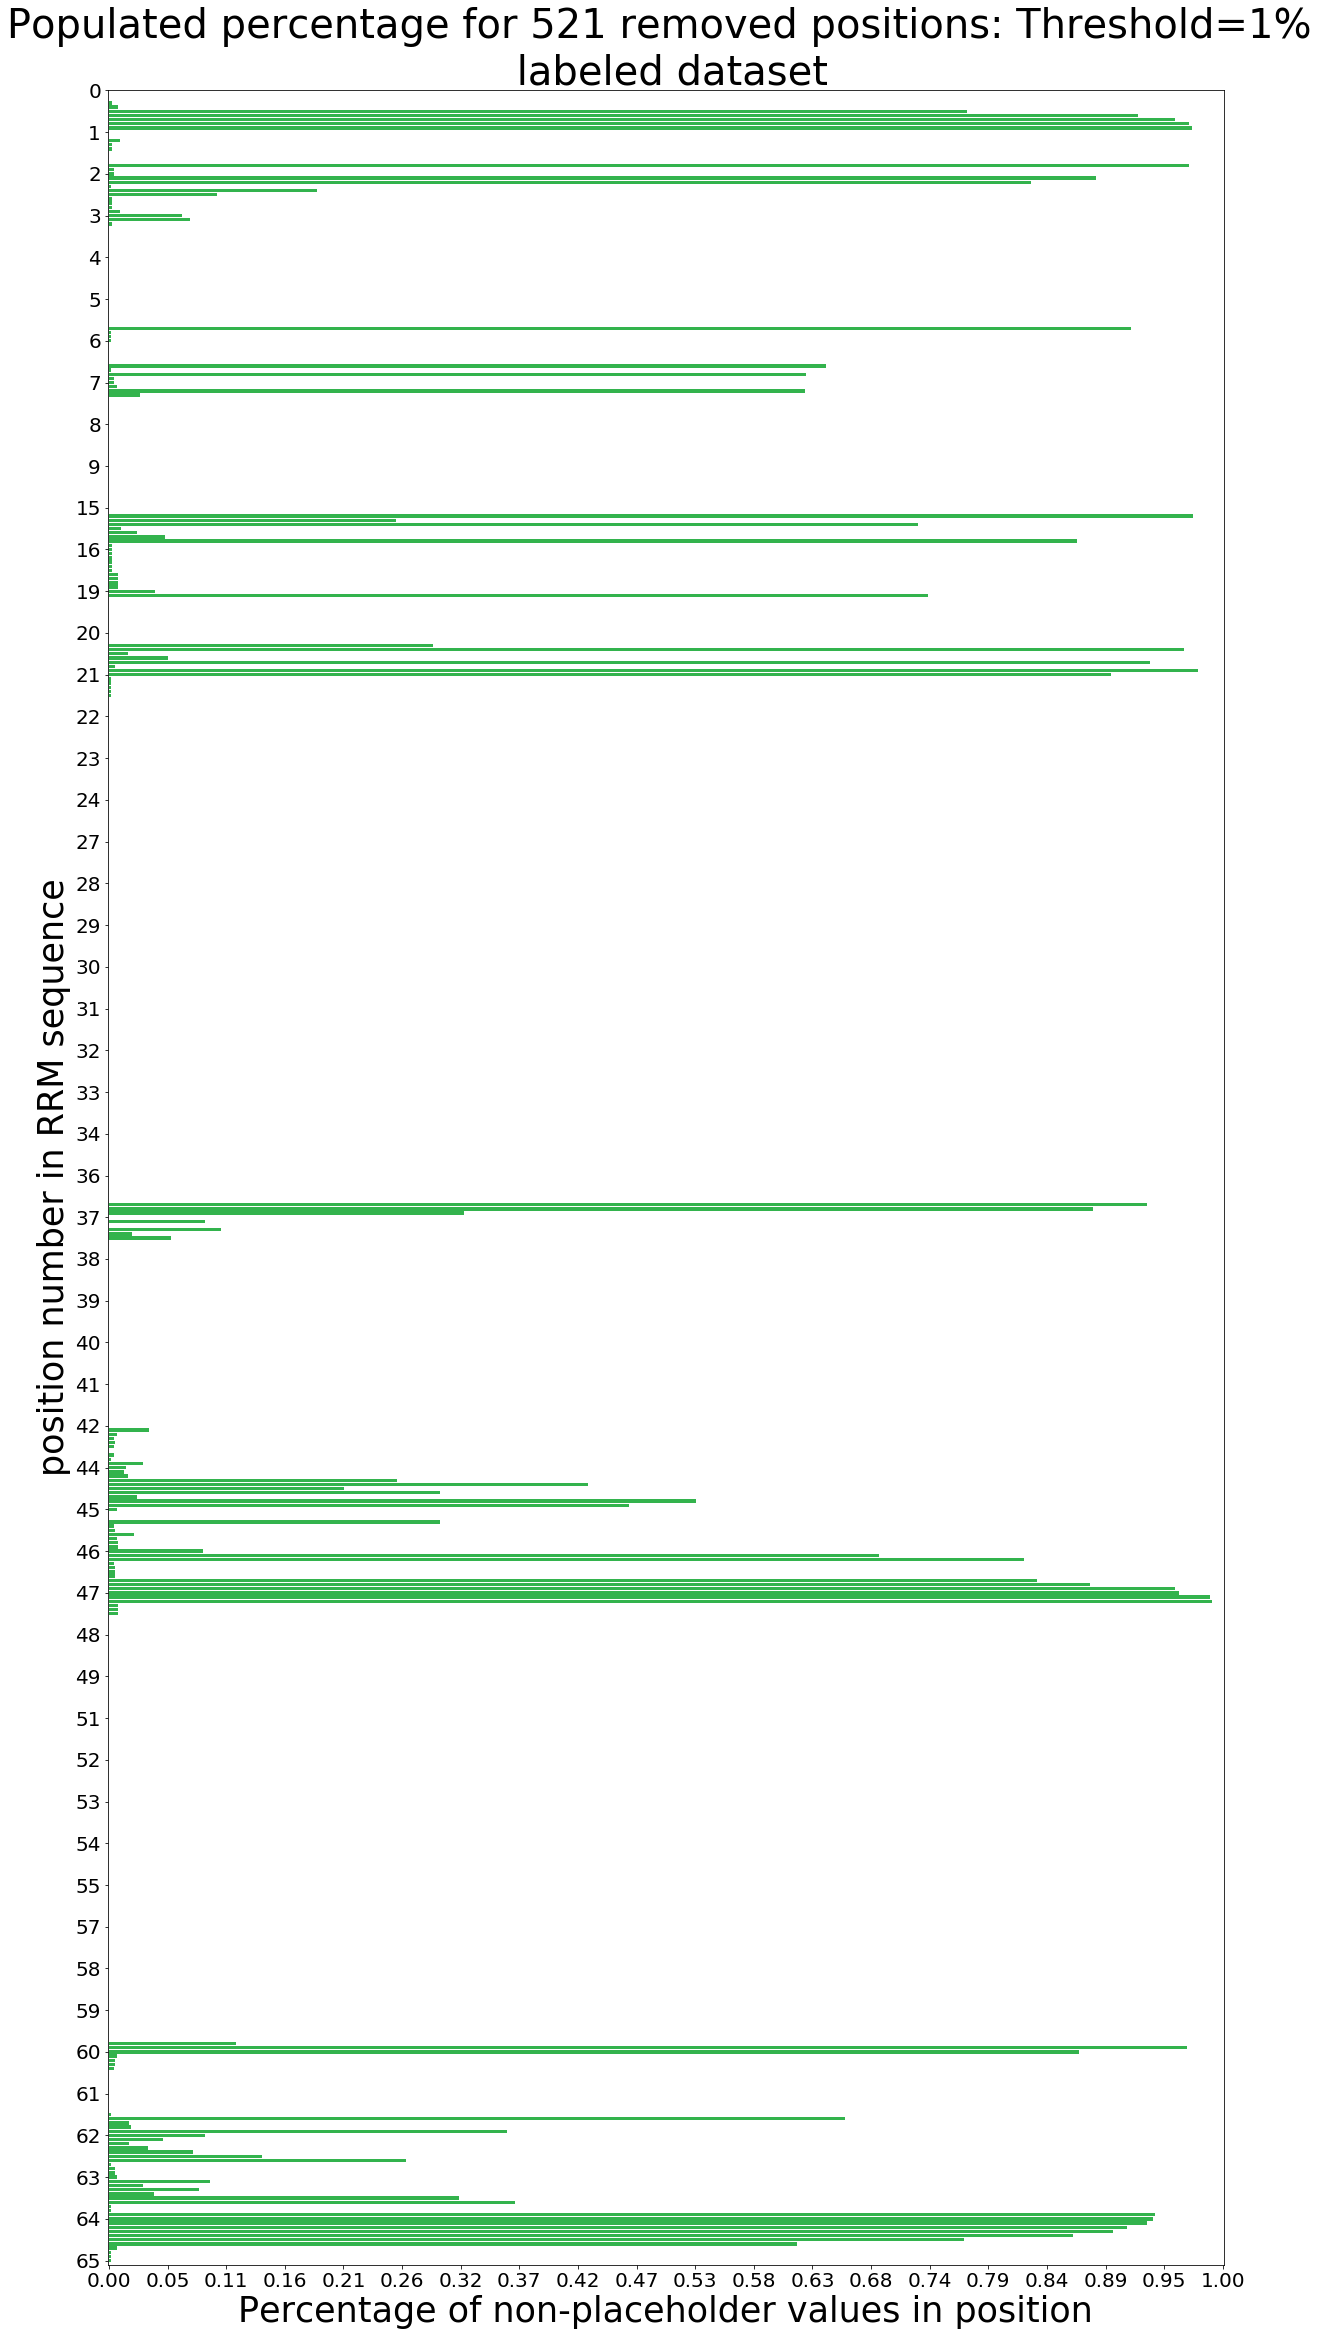

In [366]:
plot_num_population(labeled_RRM_original, threshold, removed_positions, dataset='labeled dataset', kept=False)